In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [600]:
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    mse = ((y_pred - y) @ (y_pred - y).T) / y.shape[0]
    return mse

In [601]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    random_state: int
      initial random seed for generating parameters
    
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter=10, lr=0.001, no_bias=True, verbose=False, random_state=0):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.random_state = random_state
      
    def _init_theta(self, lower, higher, size):
        """
        Generate initially random parameters value
        Parameters
        ----------
        lower: float
        left boudary
        higher: float
        right boudary
        size: int
        size of ndarray (size, )
        Returns
        -------
        The following form of ndarray, shape (n_samples,)
        Parameters vector
        """
        np.random.seed(self.random_state)
        return np.random.uniform(lower, higher, size)
  
    def _linear_hypothesis(self, X, theta):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
        theta: The following forms of ndarray, shape (n_features, )
        Parameters vector
        Returns
        -------
        The following form of ndarray, shape (n_samples, 1)
        Estimated result by linear hypothetical function
        """
        return (X @ theta.T).astype(np.longdouble)
    
    def _diff(self, X, y, theta):
        return (X.T @ (self._linear_hypothesis(X, theta) - y)).astype(np.longdouble) / X.shape[0]

    def _gradient_descent(self, X, y, error):
        """
        Compute the parameters values that minimize the cost function based on self.num_iter, self.lr.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
        y : The following form of ndarray, shape (n_samples,)
        Correct answer value of training data
        error: The following form of ndarray, shape (self.iter,)
        Loss records
        Returns
        -------
        theta: The following form of ndarray, shape (n_features, )
        Optimized parameters
        """
        theta = self._init_theta(-10, 10, X.shape[1])
        error[0] = self._compute_loss(self._linear_hypothesis(X, theta), y)
        for i in range(1, self.iter):
            theta = theta - self.lr * self._diff(X, y, theta)
            error[i] = self._compute_loss(self._linear_hypothesis(X, theta), y)

        return theta

    def _compute_loss(self, y_pred, y):
        return MSE(y_pred, y) / 2

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each    iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.verbose:
            #Output learning process when verbose is set to True
            if self.no_bias == False:
                print("Train data: Set bias column to an array of value 1")
                bias_ndarray = np.ones(X.shape[0]).reshape(X.shape[0], 1)
                print("Train data: Add bias column")
                X_train = np.concatenate((X, bias_ndarray), axis = 1)
                print("Train data: Training with gradient descent to find the optimized parameters...")
                self.theta_fit = self._gradient_descent(X_train, y, self.loss)
                print("Train data: Finish training!")

                if ((X_val is not None) and (y_val is not None)):
                    print("Validation data: Set bias column to an array of value 1")
                    val_bias_ndarray = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
                    print("Validation data: Add bias column")
                    X_val_train = np.concatenate((X_val, val_bias_ndarray), axis = 1)
                    print("Validation data: Training with gradient descent to find the optimized parameters...")
                    self._gradient_descent(X_val_train, y_val, self.val_loss)
                    print("Validation data: Finish training!")
            
            else:
                print("Train data: Training with gradient descent to find the optimized parameters...")
                self.theta_fit = self._gradient_descent(X, y, self.loss)
                print("Train data: Finish training!")

                if ((X_val is not None) and (y_val is not None)):
                    print("Validation data: Training with gradient descent to find the optimized parameters...")
                    self._gradient_descent(X_val, y_val, self.val_loss)
                    print("Validation data: Finish training!")
                
        else:
            if self.no_bias == False:
                bias_ndarray = np.ones(X.shape[0]).reshape(X.shape[0], 1)
                X_train = np.concatenate((X, bias_ndarray), axis = 1)
                self.theta_fit = self._gradient_descent(X_train, y, self.loss)

                if ((X_val is not None) and (y_val is not None)):
                    val_bias_ndarray = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
                    X_val_train = np.concatenate((X_val, val_bias_ndarray), axis = 1)
                    self._gradient_descent(X_val_train, y_val, self.val_loss)
            
            else:
                self.theta_fit = self._gradient_descent(X, y, self.loss)

                if ((X_val is not None) and (y_val is not None)):
                    self._gradient_descent(X_val, y_val, self.val_loss)

        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if self.no_bias == False:
            bias_ndarray = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X_test = np.concatenate((X, bias_ndarray), axis = 1)
            y_pred = self._linear_hypothesis(X_test, self.theta_fit)
        else:
            y_pred = self._linear_hypothesis(X, self.theta_fit)
        
        return y_pred

<h3>[Problem 6] Learning and estimation</h3>

In [602]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [603]:
house_train_root = pd.read_csv('./train.csv')
house_train_root.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [604]:
house_train1 = pd.DataFrame({
            'SalePrice': house_train_root['SalePrice'],
            'GrLivArea': house_train_root['GrLivArea'],
            'YearBuilt': house_train_root['YearBuilt']
})

X = house_train1.to_numpy()[:, 1:]
y = house_train1.to_numpy()[:, 0]

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (1460, 2)
y shape: (1460,)


In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095,)
(365,)


In [606]:
def draw_y(y_pred, y_test, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle(title)

    axes[0].scatter(X_test[:, 0], y_test, label='true')
    axes[0].scatter(X_test[:, 0], y_pred, label='predict')
    axes[0].set_xlabel('GrLivArea')
    axes[0].set_ylabel('SalePrice')
    axes[0].legend()

    axes[1].scatter(X_test[:, 1], y_test, label='true')
    axes[1].scatter(X_test[:, 1], y_pred, label='predict')
    axes[1].set_xlabel('YearBuilt')
    axes[1].set_ylabel('SalePrice')
    axes[1].legend()

    fig.tight_layout()

<h4>Scratch testing</h4>

In [607]:
model_scratch = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True)
model_scratch.fit(X_train, y_train, X_test, y_test)
y_pred_scratch = model_scratch.predict(X_test)
print("\ny_pred_scratch shape: {}".format(y_pred_scratch.shape))
print("MSE_scratch: {}".format(MSE(y_pred_scratch, y_test)))

Train data: Set bias column to an array of value 1
Train data: Add bias column
Train data: Training with gradient descent to find the optimized parameters...
Train data: Finish training!
Validation data: Set bias column to an array of value 1
Validation data: Add bias column
Validation data: Training with gradient descent to find the optimized parameters...
Validation data: Finish training!

y_pred_scratch shape: (365,)
MSE_scratch: 1785427555.6110337


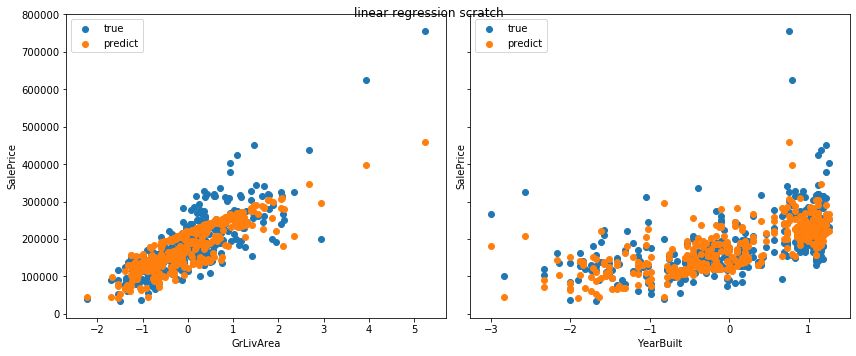

In [608]:
draw_y(y_pred_scratch, y_test, 'linear regression scratch')

<h4>Sklearn testing</h4>

In [609]:
from sklearn.linear_model import LinearRegression

In [610]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
print("y_pred shape: {}".format(y_pred_sklearn.shape))
print("MSE_sklearn: {}".format(MSE(y_pred_sklearn, y_test)))

y_pred shape: (365,)
MSE_sklearn: 1785349579.8282979


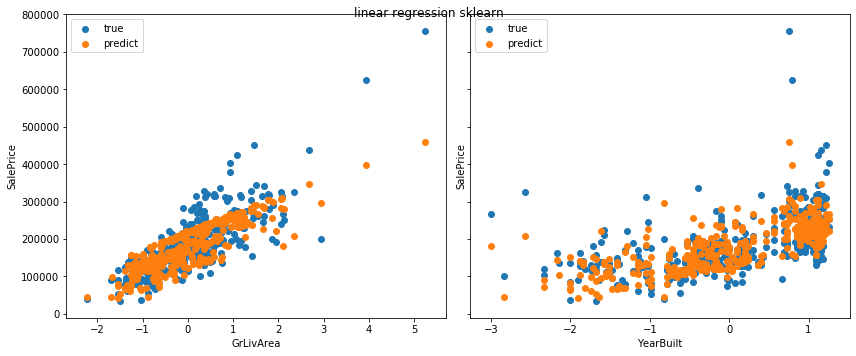

In [611]:
draw_y(y_pred_sklearn, y_test, 'linear regression sklearn')

Conclusion:

- The predicted SalePrice respect to 2 variables are similar between 2 models.
- The MSE are approximately the same.

<h3>[Problem 7] Learning curve plot</h3>

In [612]:
def draw_learning_curve(train_loss, val_loss, iter, title):
    plt.plot(list(np.arange(0, iter)), train_loss, label='train_loss')
    plt.plot(list(np.arange(0, iter)), val_loss, label='val_loss')
    plt.title(title)
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.show()

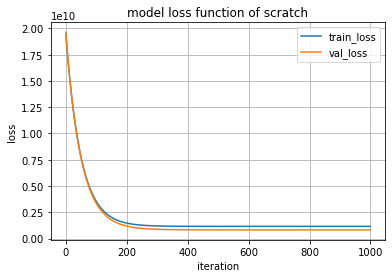

In [613]:
draw_learning_curve(model_scratch.loss, model_scratch.val_loss, model_scratch.iter, 'model loss function of scratch')

<h3>[Problem 8] (Advance task) Removal of bias term</h3>

In [614]:
model_scratch_nobias = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=True)
model_scratch_nobias.fit(X_train, y_train, X_test, y_test)
y_pred_scratch_nobias = model_scratch_nobias.predict(X_test)
print("\ny_pred_scratch_nobias shape: {}".format(y_pred_scratch_nobias.shape))
print("MSE_scratch_nobias: {}".format(MSE(y_pred_scratch_nobias, y_test)))

Train data: Training with gradient descent to find the optimized parameters...
Train data: Finish training!
Validation data: Training with gradient descent to find the optimized parameters...
Validation data: Finish training!

y_pred_scratch_nobias shape: (365,)
MSE_scratch_nobias: 34942563431.45793


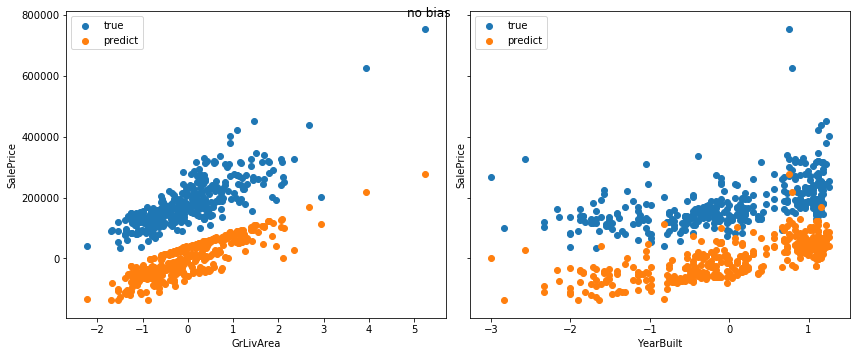

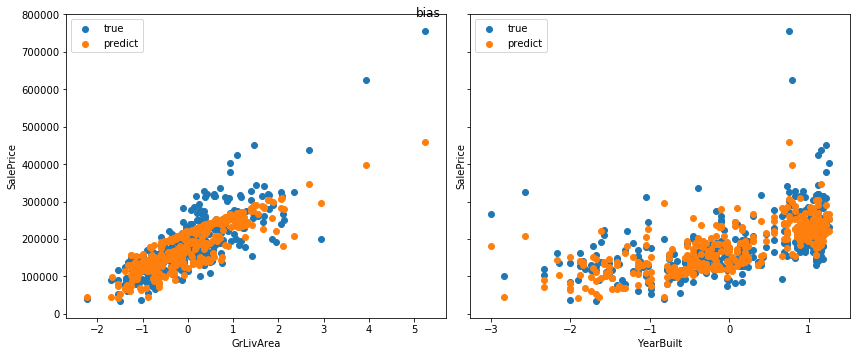

In [615]:
draw_y(y_pred_scratch_nobias, y_test, 'no bias')
draw_y(y_pred_scratch, y_test, 'bias')

From the graph without bias, we can see that there is a large deviation between the true sale prices and the predicted sale prices (below the true values) and some prediction are negative, but the pattern seem to similar to the graph with bias.

From the graph with bias, we can see that the bias has "elevated" the predicted values to the appropriate positions that fit the true values.

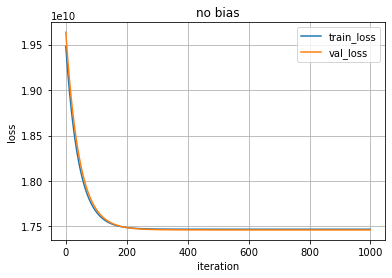

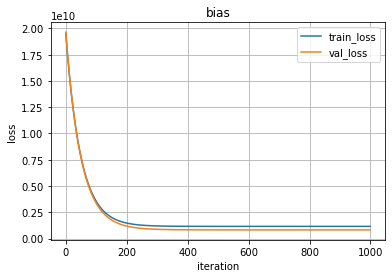

In [616]:
draw_learning_curve(model_scratch_nobias.loss, model_scratch_nobias.val_loss, model_scratch_nobias.iter, 'no bias')
draw_learning_curve(model_scratch.loss, model_scratch.val_loss, model_scratch.iter, 'bias')

Without bias, we can see the values of train_loss and val_loss is similar at every interation. With bias, the val_loss is lower than the train_loss when they both reach the stable state.

<h3>[problem 9] (Advance task) Multidimensional feature quantity</h3>

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
X_train = X_train**3
X_test = X_test**3
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [622]:
model_scratch = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False)
model_scratch.fit(X_train, y_train, X_test, y_test)
y_pred_scratch = model_scratch.predict(X_test)
print("\ny_pred_scratch shape: {}".format(y_pred_scratch.shape))
print("MSE_scratch: {}".format(MSE(y_pred_scratch, y_test)))


y_pred_scratch shape: (365,)
MSE_scratch: 2541609381.3563104


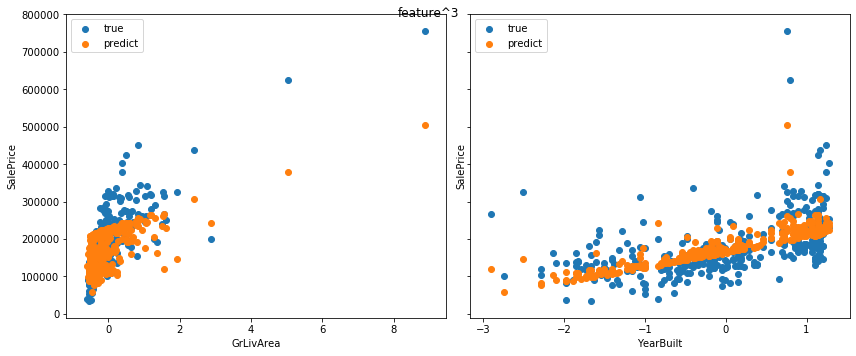

In [623]:
draw_y(y_pred_scratch, y_test, 'feature^3')

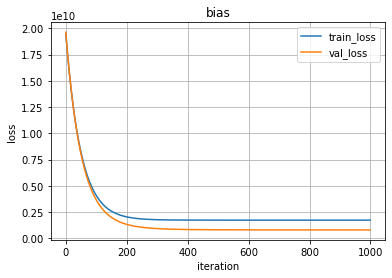

In [624]:
draw_learning_curve(model_scratch.loss, model_scratch.val_loss, model_scratch.iter, 'bias')

The MSE is higher than previous models, the predicted value seems to be denser at some points. The train_loss is higher a little bit due to higher MSE.

<h3>[problem 10] (Advance task) Derivation of update formula</h3>

We can get that formula by using the derivative of (ax + b)^2 = 2a(ax + b).
<br>
The sum of J(theta) can be break down into many (theta_i \* x + y)^2 terms.
<br>
By taking the derivative of a theta_i in gradient descent formula, we can set (theta_i\*x + y)^2 to be taken derivative, other terms is considered a constant value C.
<br>
=> (theta_i*x + y)^2 + C
<br>
Derivative of the above function is 2x(theta_i\*x + y)
<br>
Repeat with other i value.
<br>
=> the value 2 is disapeared in the final formular because 2 / 2 is 1.